# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as mod
import seaborn as sns
sns.set()
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\eturk\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


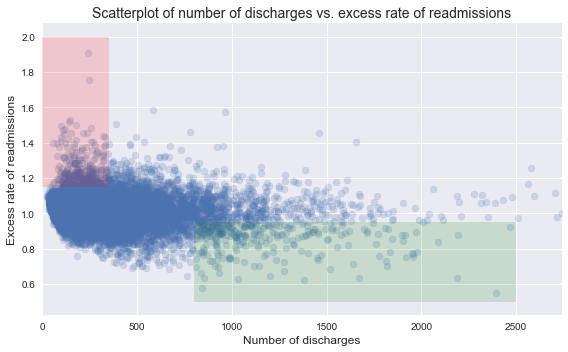

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# My Analysis and Recommendation on Hospital Readmissions

## A. Do you agree with the above analysis and recommendations? Why or why not?

The above analysis is a good start point but now quite enough to draw conclusions and analysis set forth since they are only based on one scatter plot of the data, with no supporting statistical analysis to substantiate the claims. For that reason, I found those recommendations suspicious. I will check all those claims's truthfullness by applying exploratory data analysis.

**Let's start by inspecting data**

In [23]:
clean_hospital_read_df.sample(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
7443,CAROLINAS MEDICAL CENTER-PINEVILLE,340098,NC,READM-30-HF-HRRP,662,NaN,0.9895,21.7,21.9,143.0,07/01/2010,06/30/2013
12543,WINN PARISH MEDICAL CENTER,190090,LA,READM-30-HF-HRRP,87,NaN,0.8935,20.1,22.5,11.0,07/01/2010,06/30/2013
8466,ST MARY'S MEDICAL CENTER,100288,FL,READM-30-PN-HRRP,80,NaN,0.9763,16.8,17.2,12.0,07/01/2010,06/30/2013
1979,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,210029,MD,READM-30-COPD-HRRP,575,NaN,1.0869,23.6,21.7,142.0,07/01/2010,06/30/2013
4974,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,670068,TX,READM-30-HF-HRRP,103,NaN,1.0249,22.9,22.3,25.0,07/01/2010,06/30/2013


In [24]:
clean_hospital_read_df.describe(include='all')

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
count,11578,11578.000000,11578,11578,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000,11578,11578
unique,2921,NaN,51,5,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,GOOD SAMARITAN HOSPITAL,NaN,CA,READM-30-HF-HRRP,NaN,NaN,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
freq,30,NaN,944,2841,NaN,NaN,NaN,NaN,NaN,NaN,11578,11578
mean,NaN,257681.537226,NaN,NaN,362.909397,7.0,1.007504,17.984292,17.865695,63.633731,NaN,NaN
std,NaN,154542.645531,NaN,NaN,309.176945,0.0,0.091964,5.487651,5.240749,59.540296,NaN,NaN
min,NaN,10001.000000,NaN,NaN,0.000000,7.0,0.549500,2.700000,3.900000,11.000000,NaN,NaN
25%,NaN,110129.750000,NaN,NaN,157.000000,7.0,0.952600,16.300000,16.600000,24.000000,NaN,NaN
50%,NaN,250040.000000,NaN,NaN,280.000000,7.0,1.003500,19.000000,19.000000,45.000000,NaN,NaN
75%,NaN,390041.000000,NaN,NaN,472.750000,7.0,1.058100,21.500000,21.400000,82.000000,NaN,NaN


In [7]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [8]:
# Find the missing values
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

There are 11497 missing values in 'Footnote' feature. Besides that, there are 81 missing values in each 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', and 'Number of Readmissions' features.

In [25]:
# Check the duplicate observations
clean_hospital_read_df.duplicated().sum()

0

I checked whether there is any duplicate observations in order to drop it. The result shows that there is no duplicate value. 

In [26]:
# There are less missing values which are 81 out of 11578. Therefore, we can drop them. 
hospital_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate',
                                     'Number of Readmissions'])
hospital_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [27]:
# Drop 'Footnote' column
hospital_df.drop(columns= ['Footnote'], inplace=True, errors='ignore')
hospital_df

C:\Users\eturk\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


 I will use the scatter plot and their dataframe for inspecting their analysis. 

### Preliminary Report - A: Initial observations based on the plot above

**Overall, rate of readmissions is trending down with increasing number of discharges**

**With lower number of discharges, there is a greater incidence of excess rate of readmissions**

**With higher number of discharges, there is a greater incidence of lower rates of readmissions**

It is tempting to guess this trend, since the notable extreme points draw the eye from top left to bottom right. However, it is essential to consider the entire data set, including the very dense collection of points in the center. Pearson correlation coefficient will suffice to understand if there is a relationship among data points.

In [28]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x,y], axis=1)
df.columns = ['discharges', 'excess_readmissions']
df.head()

,discharges,excess_readmissions
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [29]:
# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
import scipy.stats as stats

corr = stats.pearsonr(x,y)
print("The Pearson correlation coefficient: {}".format(corr[0]))
print("The p-value of a two-tailed test: {}".format(corr[1]))

The Pearson correlation coefficient: [-0.09309554]
The p-value of a two-tailed test: [1.50227564e-23]


C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


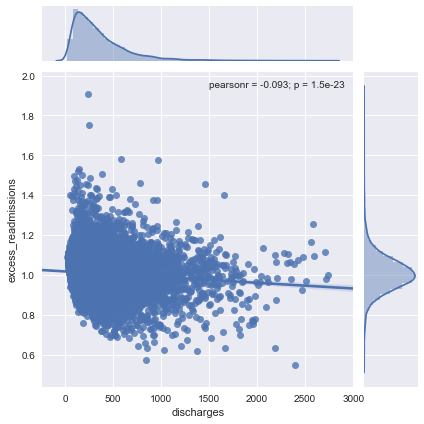

In [14]:
sns.jointplot('discharges','excess_readmissions', data= df, kind='reg')

The correlation is negative and almost zero. We do not have enough evidence to tell the two variables correlated with each other. Moreover,it's not obvious to see that with a lower number of discharges, there is a greater incidence of excess rate of readmissions or vice versa.

Hypothesis testing conducted in Pearson's correlation with the Null Hypothesis that there is no correlation between the number of discharges and the excess admission ratio. Observed p_value is highly significant, and so the null hypothesis H0 can be rejected. Thus this negative relationship between variables is statistically significant.

Consequently, I would not assume that hospitals with a smaller number of discharges will always have a higher excess readmission ration as the correlation coefficient is too small. To verify I would suggest doing a hyptohesis testing of two samples such that one group contains hospitals with less than 100 discharges and the other hospitals with 1000 or more discharges.

### Premilinary Report - B: Statistics

**- In hospitals/facilities with number of discharges < 100,** 

    mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [15]:
# Discharges below 100

low_df = df[df.discharges < 100]
low_discharges, low_excess_readmissions = low_df.mean()
low_greater_than_one = len(low_df[low_df.excess_readmissions > 1]) / len(low_df)

print('Excess readmission rate :', '%.3f' % low_excess_readmissions)
print('%.2f' % low_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 1.023
0.63 have excess readmission rate greater than 1.


C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


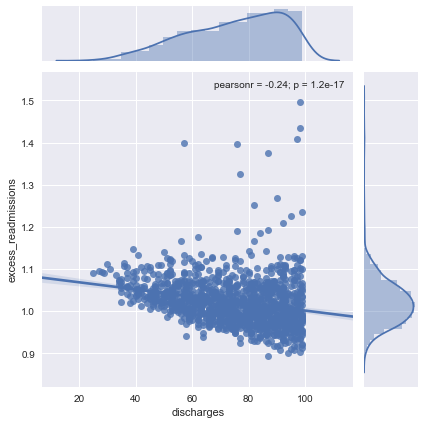

In [16]:
sns.jointplot('discharges', 'excess_readmissions', data=low_df, kind='reg')

**- In hospitals/facilities with number of discharges > 1000,**

    mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [17]:
# discharges above 1000

high_df = df[df.discharges > 1000]
high_discharges, high_excess_readmissions = high_df.mean()
high_greater_than_one = len(high_df[high_df.excess_readmissions > 1]) / len(high_df)

print('Excess readmission rate :', '%.3f' % high_excess_readmissions)
print('%.2f' % high_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 0.979
0.45 have excess readmission rate greater than 1.


C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\eturk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


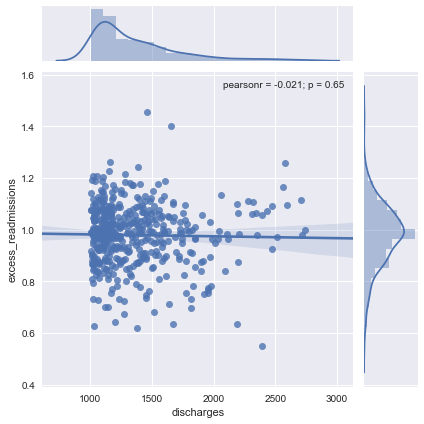

In [18]:
sns.jointplot('discharges', 'excess_readmissions', data=high_df, kind='reg')

I verified the statistical statement in their analysis. According to the dataframe which they worked on it, the statistical results are true. But one should expect this results verified on their report. It is essential to present the proof of your work. If this is accompanied by visual tools, it will make more sense as well. 

### Premilinary Report - C: Conclusions

**There is a significant correlation between hospital capacity (number of discharges) and readmission rates.**

Pearson's correlation test provided that there is not a strong correlation between hospital capacity ( number of discharges) and readmission rates. p_value from the test suggest that this low correlation is significant so we can reject the null hypothesis of non-correlation embeded in the test.

**Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.**

This statement might be true, but there might be some other factors causing this particular situtation such as insurance and doctor ratings not available in the data. Hence, It is not practical to assume that hospitals with smaller number of discharges will assume that hospitals with smaller number of dischrages will always have a higher excess readmission rates.

### Premilinary Report - D: Regulatory policy recommendations

**Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.**

In [19]:
low_df = df[df.discharges < 300]
low_discharges, low_excess_readmissions = low_df.mean()
low_greater_than_one = len(low_df[low_df.excess_readmissions > 1]) / len(low_df)

print('Excess readmission rate :', '%.3f' % low_excess_readmissions)
print('%.2f' % low_greater_than_one, 'have excess readmission rate greater than 1.')

Excess readmission rate : 1.014
0.54 have excess readmission rate greater than 1.


If trying to meet regulatory policies, then smaller hospitals should be required to demonstrate upgraded resource allocation. However, at a business perspective, they should be reccomended to do so only if it is beneficial for the hospital itself. Let's make a camp fire on it in terms of pros and cons. 

Pros:
- Save patient time
- Increase space for new patients
- Secure government funding

Cons:
- Less readmissions could result in less income
- Low income could lead to shut down of smaller hospitals

I would not recommend that hospitals with smaller capacity be required to upgrade their resources or facilities.

**Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.**

Following the previous logic, this could benefit patient or the hospital. The directives and incentives should vary due to different circumstances. For example, larger hospitals with more flexible budgets could focus on less excess readmission. Smaller hospitals could be encouraged to consolidate if it could benefit them over simply reallocating resources.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

For this part of the question, I will use the dataframe which I preprocessed myself at the begining. 

### Setup an appropriate hypothesis test.

Before setting an approptiate hypothesis test, let's explore a little further.

In [34]:
# Calculate the pearson correlations

print(stats.pearsonr(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio']))

(-0.09739794351079353, 1.222547377680967e-25)


Pearson r value is -0.0973979435107935 while two tailed p-value is 1.222547377680967e-2. Those values indicate that there is a small correlation between number of discharges and excess readmission. Furthermore, the p-value is so miniscule that this is statistically significant. 

Our hypothesis will inquire if there is a true difference in the readmission excess in hospitals below 100 discharged and those greater than 1000. 

**Null Hypothesis (Ho) : There is no difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000**

**Alternative Hypothesis (H1): There is a significant difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000**

### Compute, report the observed significance value (or p-value) and report statistical significance for $\alpha$ = .01

In [38]:
# Create subsets of the data
less_than_100 = hospital_df[(hospital_df['Number of Discharges'] < 100)]
great_than_1000 = hospital_df[(hospital_df['Number of Discharges'] > 1000)]

# Create a two-sample t-test
t_test = stats.ttest_ind(less_than_100['Excess Readmission Ratio'], great_than_1000['Excess Readmission Ratio'])

# Compare two groups via mean
means = mod.CompareMeans(mod.DescrStatsW(less_than_100['Excess Readmission Ratio']), mod.DescrStatsW(great_than_1000['Excess Readmission Ratio']))

# Use alpha as 0.01  (99% CI)
print('99% CI of the difference of means: ', means.tconfint_diff(alpha = 0.01, usevar='unequal'))
print(t_test)

99% CI of the difference of means:  (0.029225356358290495, 0.05934050164579684)
Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)


p value is so small from alpha value (0.01). Given the results above we reject the null hypothesis and say that there is a difference in the average and that we are 99% confident that it is between 0.029 and 0.059 

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

**Discussion on statistical significance and practical significance:**

- Statistical significance refers to the unlikelihood that the result is obtained by chance, i.e., probability of relationship between two variables exists. Practical significance refers to the relationship between the variables and the real world situation.

- Statistical significance depends upon the sample size, practical significance depends upon external factors like cost, time, objective, etc.

- Statistical significance does not guarantee practical significance, but to be practically significant, a data must be statistically significant.

Click on this [link](http://www.differencebetween.net/science/mathematics-statistics/difference-between-statistical-significance-and-practical-significance/#ixzz5ZEwMu3oW) to read more about "Statistical significance vs Practical significance" 

Using discharge rate as a marker for hospital size is a flawed metric and does not necessarily correlate with hospital size e.g. there are large hospital with low turn over rate and vise versa. The key point here is that despite the fact that there is a difference in the ratio, it is not a practical difference. 

Thus, the recommdation for hospital to have to show upgrades in order to maintain operation and that we should push toward medical mega centers are unfounded by the available data. Not to mention that those proposed changes imply millions of dollars worth of facility and infrastructural change and much more substantial support would be needed.

### Look at the scatterplot above.
**What are the advantages and disadvantages of using this plot to convey information?**

Scatter plots are good for visulizing relationship between continuous variables but without a sound statistical analysis it is not appropriate to reach out the conclusion from scatter plots.

**Construct another plot that conveys the same information in a more direct manner.**

The scatter-plot shows too much information in a small space. A better visual would be to provide joint-plots of histograms to see the number of observations is skewed towards the hospitals with smaller/larger facilities as I presented above. 

Another plot would be also box plot compare the excess rate of readmissions for small (<100 discharges) and large (>100 discharges).

Text(0.5,1,'Excess rate of readmissions for small (<100 discharges) and large (>100) facilities')

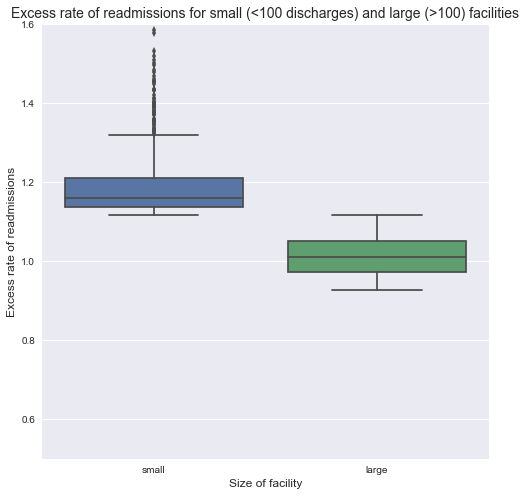

In [49]:
values = ['small' if discharges < 100 else 'large' for discharges in hospital_df['Number of Discharges']]
dframe = pd.DataFrame(values,columns=['size'])
dframe = pd.concat([dframe['size'], hospital_df['Excess Readmission Ratio']], axis=1)

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='size', y='Excess Readmission Ratio', data = dframe)
#ax = sns.swarmplot(x= 'size', y='Excess Readmission Ratio', data = dframe)
ax.set_ylim([0.5, 1.6])
ax.set_xlabel('Size of facility', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Excess rate of readmissions for small (<100 discharges) and large (>100) facilities', fontsize=14)